# Project 1 - Extended Otsu’s method 

Mengxi Wu - mw4355
Qi Yin - qy652


## Set up the environment

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

## Read and preprocess image

The shape of food picture: (240, 320, 3) 
The shape of food picture: (363, 484, 3) 
The shape of food picture: (461, 690, 4) 


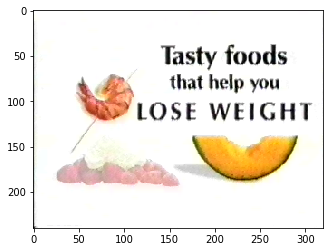

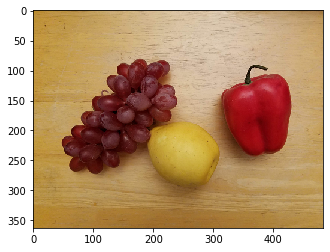

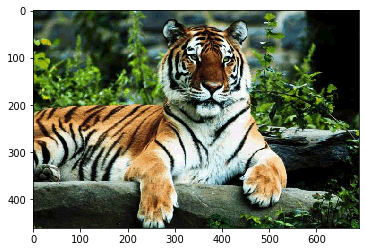

In [2]:
# read images
food_I = mpimg.imread('./data13.bmp')
fruit_I = mpimg.imread('./fruits2b.bmp')
tiger_I = mpimg.imread('./tiger1.bmp')

## check the size of image
print(f"The shape of food picture: {food_I.shape} ")
print(f"The shape of food picture: {fruit_I.shape} ")
print(f"The shape of food picture: {tiger_I.shape} ")

# use matplotlib to display images
plt.imshow(food_I)
plt.show()
plt.imshow(fruit_I)
plt.show()
plt.imshow(tiger_I)
plt.show()

## Transform RGB Image to Grayscale Image

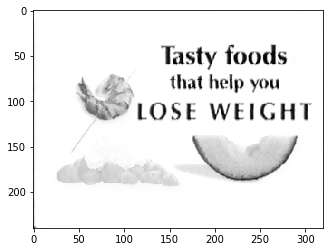

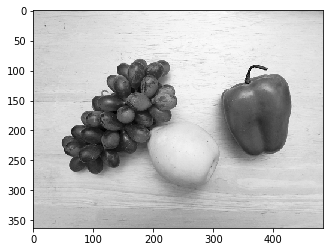

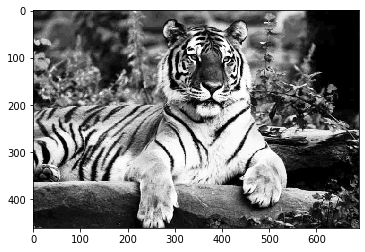

In [3]:
# for each pixel compute the grey values with R/G/B values
def RGB2Grey(I):
    height, width = I.shape[0], I.shape[1]
    gray_I = np.ones([height,width], dtype = int)
    for i in range(height):
        for j in range(width):
            if len(I[i][j]) == 3:
                r, g, b = I[i][j]
            else:
                r, g, b = I[i][j][:3]
            gray_I[i][j] = round(0.299*r +  0.587*g + 0.114*b)
    return gray_I

# transform our images
food_grey = RGB2Grey(food_I)
fruit_grey = RGB2Grey(fruit_I)
tiger_grey = RGB2Grey(tiger_I)

# display transformed images with matplotlib
plt.imshow(food_grey, cmap='Greys_r')
plt.show()

plt.imshow(fruit_grey, cmap='Greys_r')
plt.show()

plt.imshow(tiger_grey, cmap='Greys_r')
plt.show()

# save transformed images with Pil 
Image.fromarray(np.array(food_grey, dtype= 'uint8')).save('data13_out.bmp','bmp')
Image.fromarray(np.array(fruit_grey, dtype= 'uint8')).save('fruits2b_out.bmp','bmp')
Image.fromarray(np.array(tiger_grey, dtype= 'uint8')).save('tiger1_out.bmp','bmp')


## Implment Ostu's extend algorithms
1. Choosing three threshold ${t_1,t_2,t_3}$ and slit image into area1,area2, area3 and background 
2. Score(criterion) for each split: 
$$\sigma^2(t)\ =\ \omega_1(t)\sigma_1^2(t)\ +\ \omega_2(t)\sigma_2^2(t) \ +\ \omega_3(t)\sigma_3^2(t)\ +\ \omega_B(t)\sigma_B^2(t)    $$ 
$$\omega_1 =\sum_{j=0}^{t_1}H(j)\ \ \ \ \omega_2 =\sum_{j=t_1+1}^{t_2}H(j)\ \ \ \ \omega_3 =\sum_{j=t_2+1}^{t_3}H(j)\ \ \ \ \omega_B =\sum_{j=t_3+1}^{255}H(j)$$
3. check every possible split

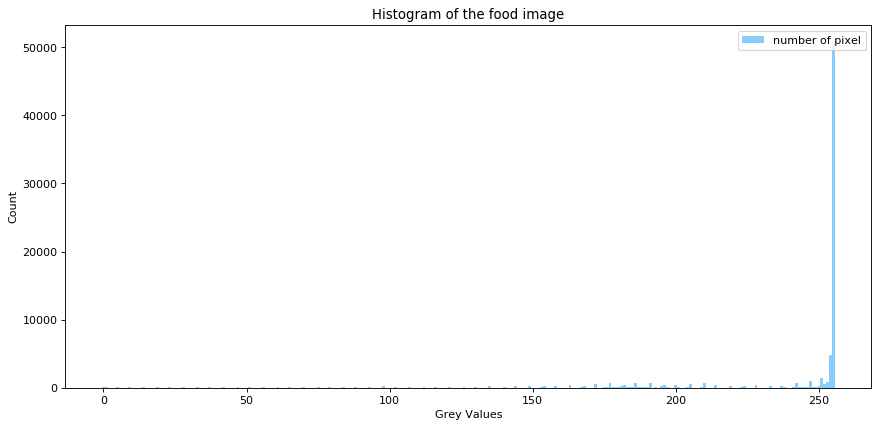

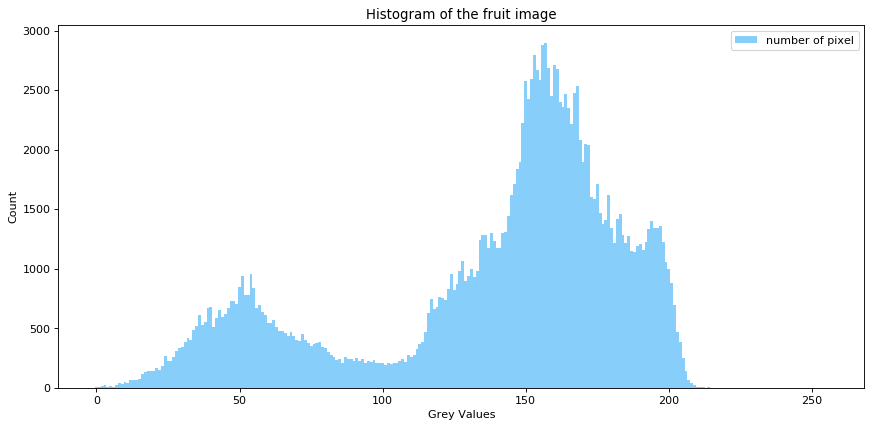

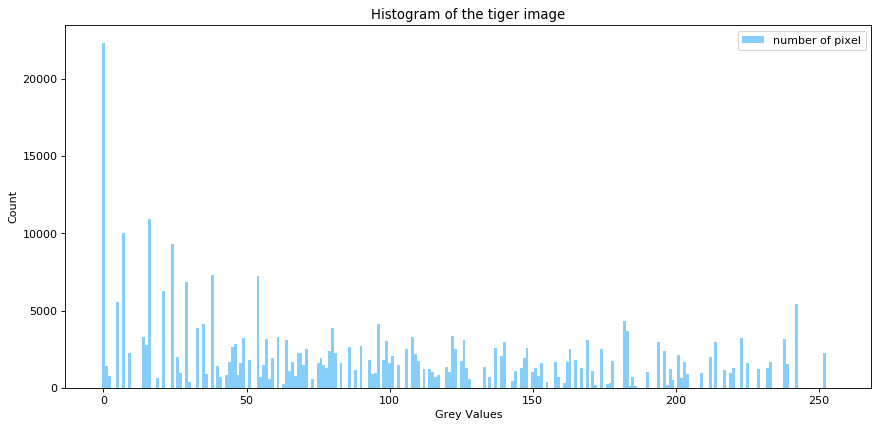

In [4]:
# compute histogram of an image: count number of pixel for each grey value
def Histogram(I):
    hist = np.zeros([256], dtype = float)
    if len(I.shape) == 2:
        height, width = I.shape
        for i in range(height):
            for j in range(width):
                hist[I[i][j]] +=1
    elif len(I.shape) == 1:
        for value in I:
            hist[value] +=1
    return hist


# display Histogram
def drawHistogram(hist, name):
    index, values, bar_width = np.arange(256), hist, 1
    plt.figure(figsize=(13, 6), dpi=80)
    plt.subplot(1,1,1)
    p2 = plt.bar(index, values, bar_width, label="number of pixel", color="#87CEFA")
    plt.xlabel('Grey Values')
    plt.ylabel('Count')
    plt.title(f'Histogram of the {name} image')
    plt.legend(loc="upper right")
    plt.show()

drawHistogram(Histogram(food_grey),'food')
drawHistogram(Histogram(fruit_grey),'fruit')
drawHistogram(Histogram(tiger_grey),'tiger')



In [5]:
# caculate variance, take a hist array as input
def computeVar(hist):
    
    # check if the area contains any pixels
    if np.sum(hist) == 0.0:
        return 0.0
    
    # count the number of pixels and sum of grey values
    pixel_num = 0
    gray_sum = 0
    for i,val in enumerate(hist):
        gray_sum += val*i
        pixel_num += val
    
    # comput means and variance
    gray_mean = gray_sum/pixel_num
    var_sum = 0.0
    for i,val in enumerate(hist):
        var_sum += (i - gray_mean)**2*val
        
    return var_sum/pixel_num
         
# main part of extended Otsu algorithms             
def Otsu(image):
    bestScore = float("inf")
    bestSplit = None
    
    # get the histogram array of input image and normalize it
    hist = Histogram(image)
    H = hist/ np.sum(hist)
    
    for t_1 in range(253):
        w_1 = np.sum(H[:t_1+1])
        var_1 = computeVar(hist[:t_1+1])
        first_part = w_1*var_1
        
        for t_2 in range(t_1+1,254):           
            w_2 = np.sum(H[t_1+1:t_2+1])
            var_2 = computeVar(hist[t_1+1:t_2+1])
            second_part = w_2*var_2
            
            for t_3 in range(t_2+1,255):
                w_3 = np.sum(H[t_2+1:t_3+1])
                w_4 = np.sum(H[t_3+1:])           
                var_3 = computeVar(hist[t_2+1:t_3+1])
                var_4 = computeVar(hist[t_3+1:])
                
                # compute the score for every possible split
                score = first_part + second_part + w_3*var_3 + w_4*var_4
                if score < bestScore:
                    bestScore, bestSplit = score, [t_1, t_2, t_3]   

    return bestScore, bestSplit



## Display the result

The best split for food image is [76, 155, 221] with score 82.61031549127036
The best split for fruit image is [87, 139, 171] with score 136.0820524920145
The best split for tiger image is [44, 104, 174] with score 327.0905459667881


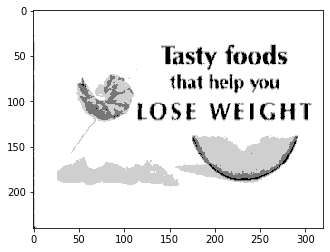

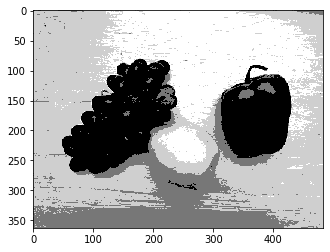

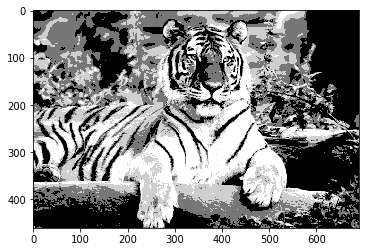

In [6]:
# run the algorithm and print the best split
food_score, food_seg  = Otsu(food_grey)
fruit_score, fruit_seg = Otsu(fruit_grey)
tiger_score, tiger_seg = Otsu(tiger_grey)

print(f"The best split for food image is {food_seg} with score {food_score}")
print(f"The best split for fruit image is {fruit_seg} with score {fruit_score}")
print(f"The best split for tiger image is {tiger_seg} with score {tiger_score}")

# apply the split(t1,t2,t3) to and image, assign four areas 0, 100, 180, 255
def segmentation(grey_I, split):
    [t1, t2, t3] = split
    height, width = grey_I.shape[0], grey_I.shape[1]
    # re-assign gray value for each pixel
    for i in range(height):
        for j in range(width):
            if grey_I[i][j] <= t1:
                grey_I[i][j] = 0
            elif grey_I[i][j] > t1 and grey_I[i][j]<= t2:
                grey_I[i][j] = 100
            elif grey_I[i][j] > t2 and grey_I[i][j]<= t3:
                grey_I[i][j] = 180
            else:
                grey_I[i][j] = 255
    return grey_I
            
# display the segmented image
seg_food = segmentation(food_grey, food_seg)
plt.imshow(seg_food, cmap='Greys_r')
plt.show()
Image.fromarray(np.array(seg_food, dtype= 'uint8')).save('data13_out_segmented.bmp','bmp')

seg_food = segmentation(fruit_grey, fruit_seg)
plt.imshow(seg_food, cmap='Greys_r')
plt.show()
Image.fromarray(np.array(seg_food, dtype= 'uint8')).save('fruits2b_out_segmented.bmp','bmp')

seg_food = segmentation(tiger_grey, tiger_seg)
plt.imshow(seg_food, cmap='Greys_r')
plt.show()
Image.fromarray(np.array(seg_food, dtype= 'uint8')).save('tiger1_out_segmented.bmp','bmp')